<a href="https://colab.research.google.com/github/neel786/ML-DL/blob/main/15_3_outliers_iqr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise: Outlier Detection and Removal Using IQR

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [2]:
df = pd.read_csv("height_weight.csv")
df.head(5)

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


##Histgram for weights

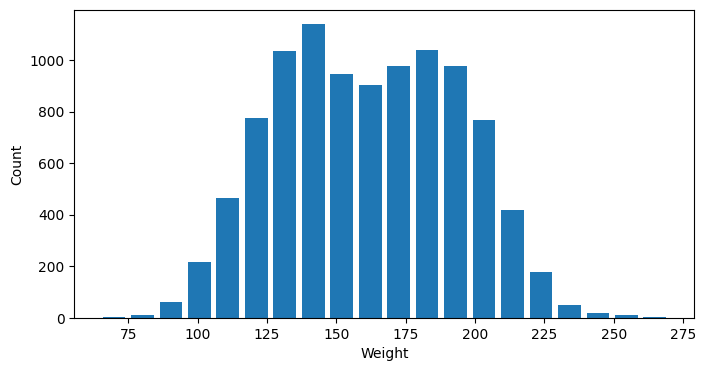

In [3]:
plt.hist(df.weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

###Histgram for heights

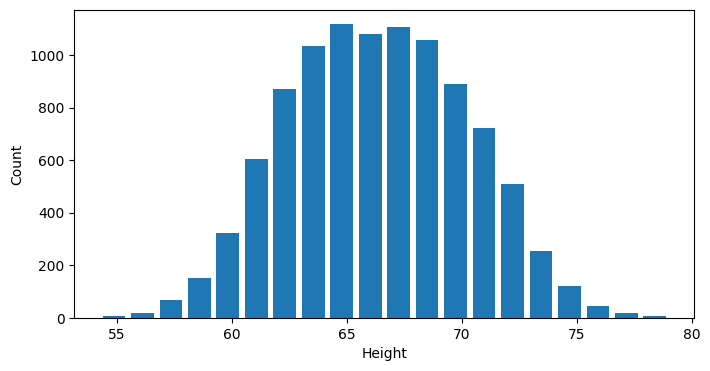

In [4]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

###Detect outliers based on weight

In [5]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1, Q3

(np.float64(135.8180513055015), np.float64(187.16952486868348))

In [6]:
IQR = Q3 - Q1
IQR

np.float64(51.35147356318197)

In [7]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(58.79084096072856), np.float64(264.19673521345646))

In [8]:
df.weight.describe()


,weight
count,10000.000000
mean,161.440357
std,32.108439
min,64.700127
25%,135.818051
50%,161.212928
75%,187.169525
max,269.989699


In [9]:
df[(df.weight<lower_limit)|(df.weight>upper_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


###Detect outliers based on height

In [10]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(np.float64(63.505620481218955), np.float64(69.1742617268347))

In [11]:
IQR = Q3 - Q1
IQR

np.float64(5.668641245615746)

In [12]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(55.00265861279534), np.float64(77.67722359525831))

In [13]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
